Task 1

In [1]:
import cv2
import numpy as np 

In [75]:
image_path = "COMP9517_20T2_Lab2_Image.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
shape = img.shape

In [69]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm
        
    def get_detector(self, params):
        if params is None:
            params = {}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

a)\
read image, default value

In [76]:
out1 = np.zeros(shape, np.uint8)
sift = SiftDetector()
keypoints1, description1 = sift.detector.detectAndCompute(img,None)
cv2.drawKeypoints(gray,keypoints1,out1)

cv2.imwrite('q1a.jpg',out1)
print("Number of points: "+str(len(keypoints1)))

Number of points: 6233


b)

In order to make the number of point in new image is around 10% of the default parameter. I first get the total point SIFT function found in previous part. Then I divided the number I got by 10, and set nfeatures to be n//10. Thus, the new keypoints is approximately equal to 10% of the default method

In [110]:
out2 = np.zeros(shape, np.uint8)
para = {"n_features":len(keypoints1)//10,"n_octave_layers":3, "contrast_threshold":0.03,"edge_threshold":10,"sigma":1.6}
sift = SiftDetector(_,para)
keypoints2, description2 = sift.detector.detectAndCompute(img,None)
cv2.drawKeypoints(gray,keypoints2,out2)

cv2.imwrite('q1b.jpg',out2)
print("Number of points: "+str(len(keypoints2)))

Number of points: 623


a)Unchanged(100%)              | b)Changed(10%)
:-----------------------------:|:---------------------------:
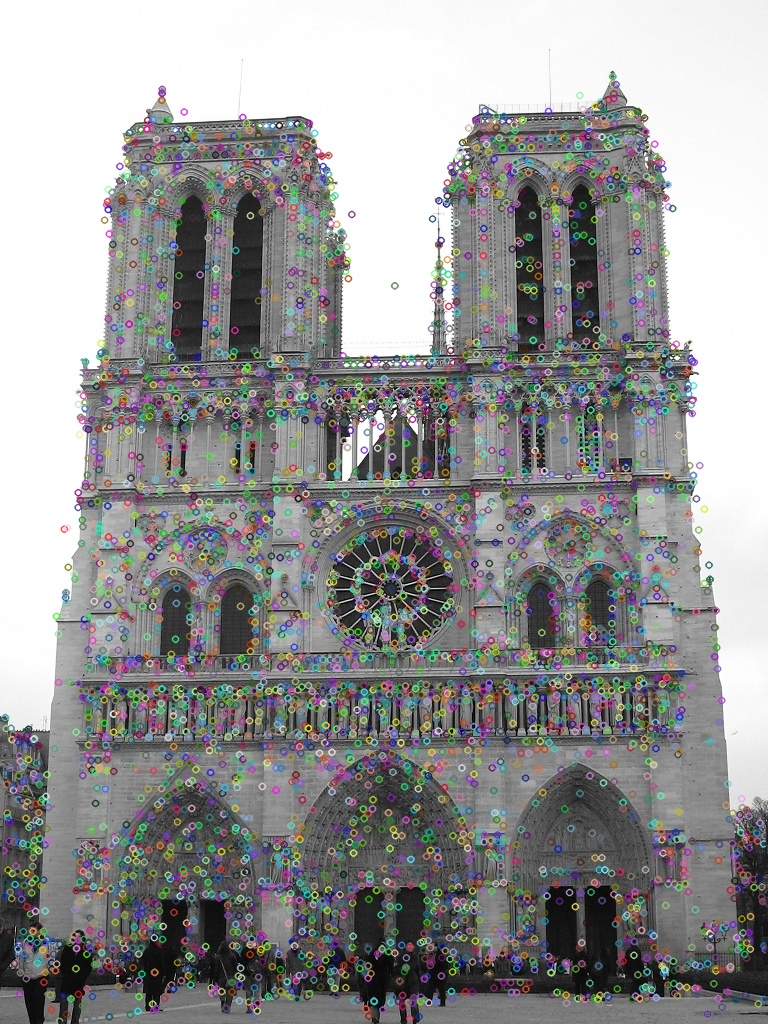|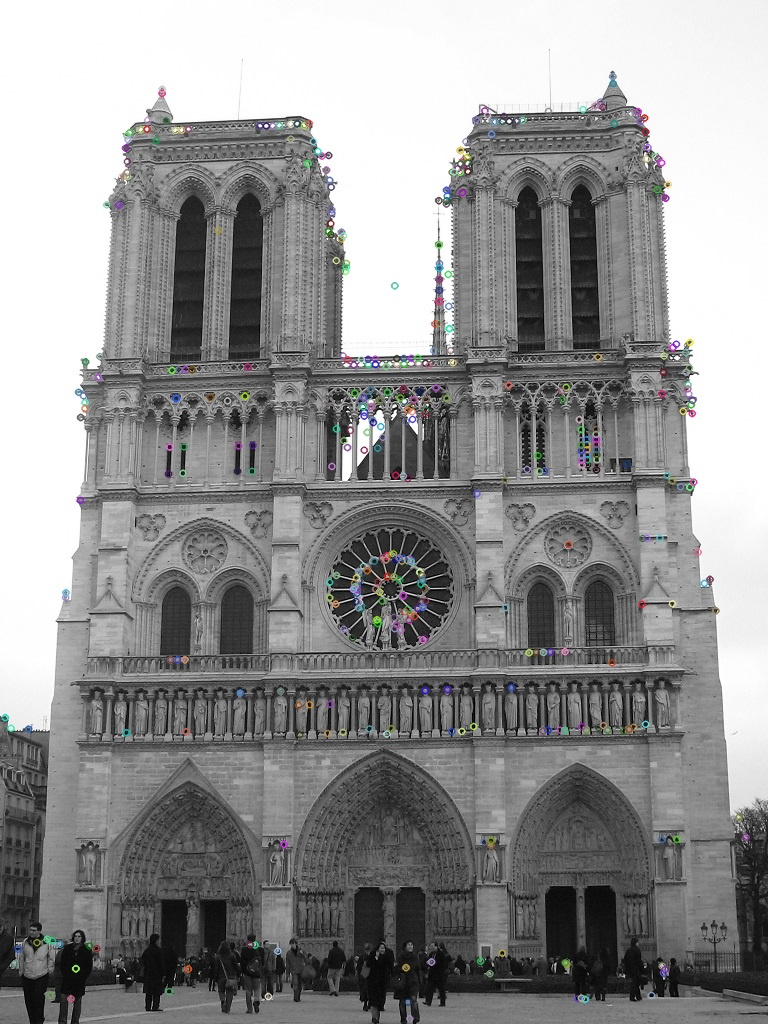

Task 2\
a)

In [122]:
height = int(shape[0]*1.15)
width = int(shape[1]*1.15)
scaled_size = (width,height)
scaled_shape = (width,height,3)
scaled = cv2.resize(img,scaled_size)
cv2.imwrite('q2scaled.jpg',scaled)
print("unchanged size: " + str(shape) + "changed size: " + str(scaled.shape))

unchanged size: (1024, 768, 3)changed size: (1177, 883, 3)


b)

In [130]:
image_path = "q2scaled.jpg"
after_scaled = cv2.imread(image_path)
gray_scaled  = cv2.cvtColor(after_scaled, cv2.COLOR_BGR2GRAY)

out3 = np.zeros(after_scaled.shape, np.uint8)
sift = SiftDetector(_,para)
keypoints3, description3 = sift.detector.detectAndCompute(after_scaled,None)
cv2.drawKeypoints(gray_scaled,keypoints3,out3)
cv2.imwrite('q2a.jpg',out3)
print("Number of points: "+str(len(keypoints3)))

Number of points: 623


b)Enlarged(10%)              |
:-----------------------------:|
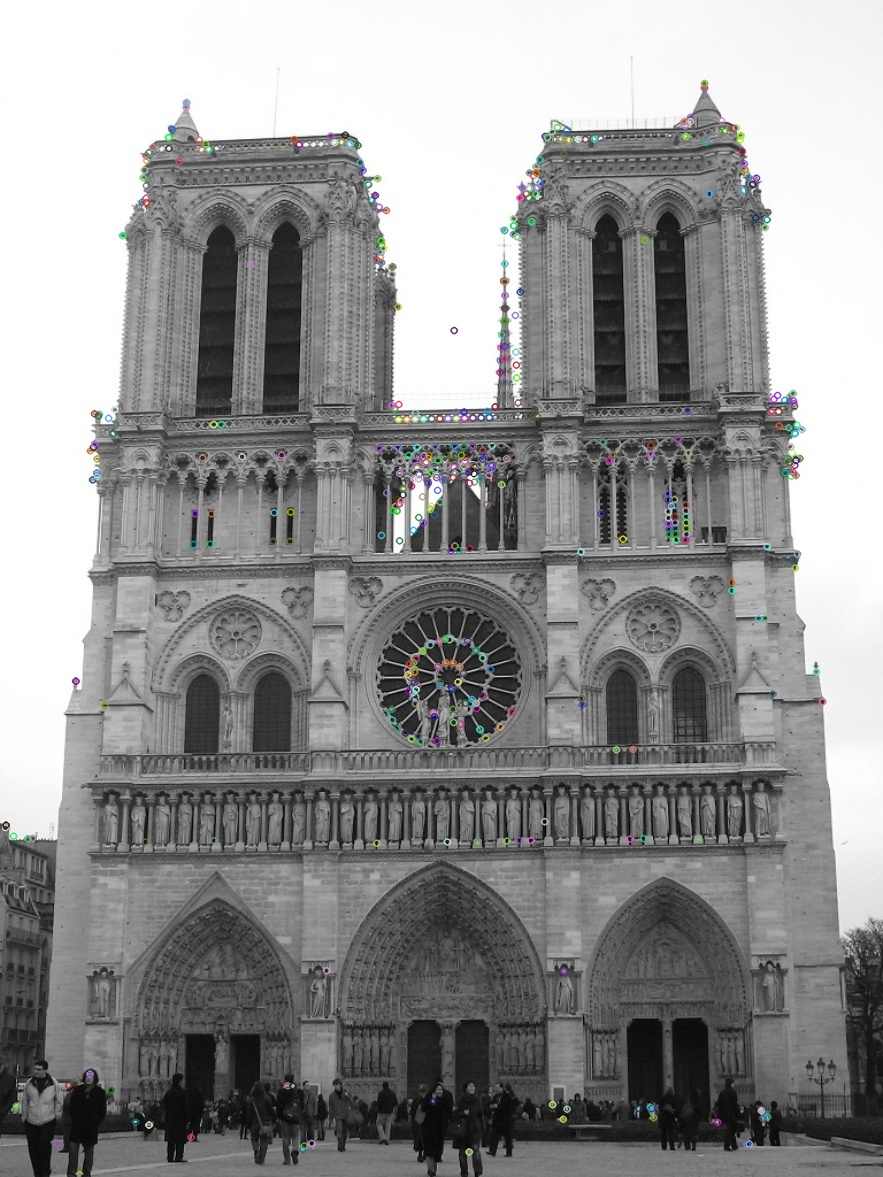|

c)\
As we see from above image, the keypoints we get after the image has been scaled is still roughly same as the image we got in q1 b). But some of part become inapproriate and cannot fit the building as accurate as the keypoints in q1 d) can. Refer to the central right area of this building, there is a circle that come with a point in middle. In particular, the q2 b) image,the centre of this circle has no keypoints lay on there. Comparing to the image in q1 b), the same circle has a key point in the middle.\
One possible reason for this is happend because the total number of points is still same as the number in q1 part b, but the image has been scaled. Thus, in order to make the image more accurate, the number of points should be added. Otherwise there won't have enough keypoints to descripe the image's feature.

d)

In [132]:
bf = cv2.BFMatcher()
matches = bf.match(description2,description3)
matches = sorted(matches, key = lambda x:x.distance)
out4 = cv2.drawMatches(out2,keypoints2,out3,keypoints3,matches[:5], flags=2,outImg=None)
cv2.imwrite("q2d.jpg",out4)

True

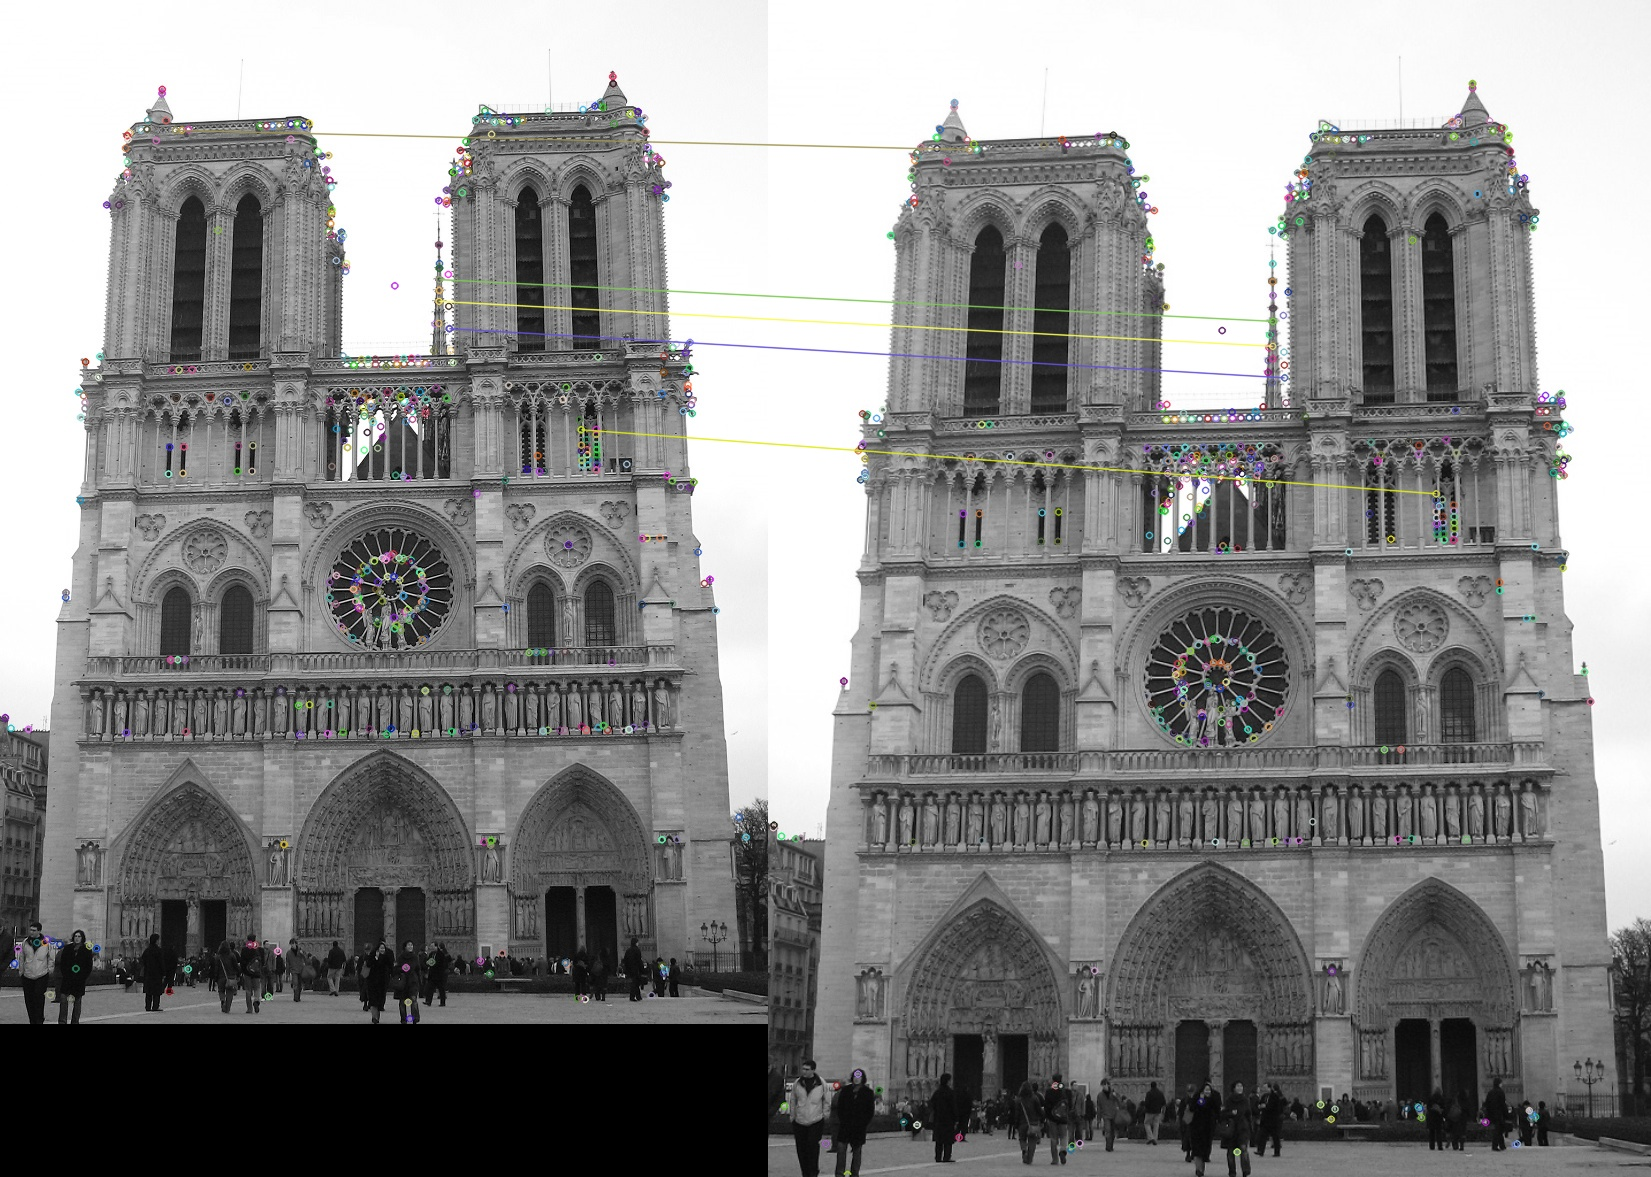

Task3\
a)

In [133]:
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]
    return cv2.warpAffine(image, rot_matrix, (w, h))

In [140]:
out5 = np.zeros(shape,np.uint8)
rotated = rotate(gray,width//2,height//2,300)
sift = SiftDetector(_,para)
keypoints4, description4 = sift.detector.detectAndCompute(rotated,None)
cv2.drawKeypoints(rotated,keypoints4,out5)
cv2.imwrite("q3a.jpg",out5)

True

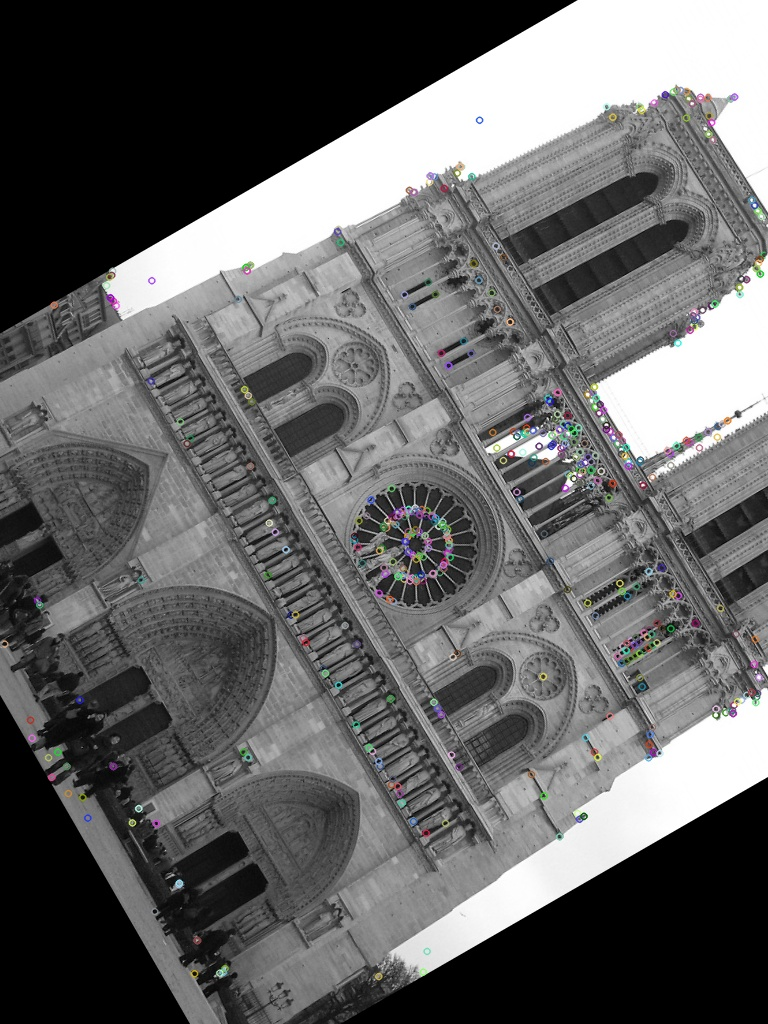

c)\
Refer to the image in above, the keypoints of the rotated image is roughly the same as
those of the original image. It shows that the keyponits before/after rotation is similar. Hence, this obeservation implies that rotations does not effect the feature SIFT will get. 

In [141]:
matches = bf.match(description2,description4)
matches = sorted(matches, key = lambda x:x.distance)
out6 = cv2.drawMatches(out2,keypoints2,out5,keypoints4,matches[:6], flags=2,outImg=None)
cv2.imwrite("q3d.jpg",out6)

True

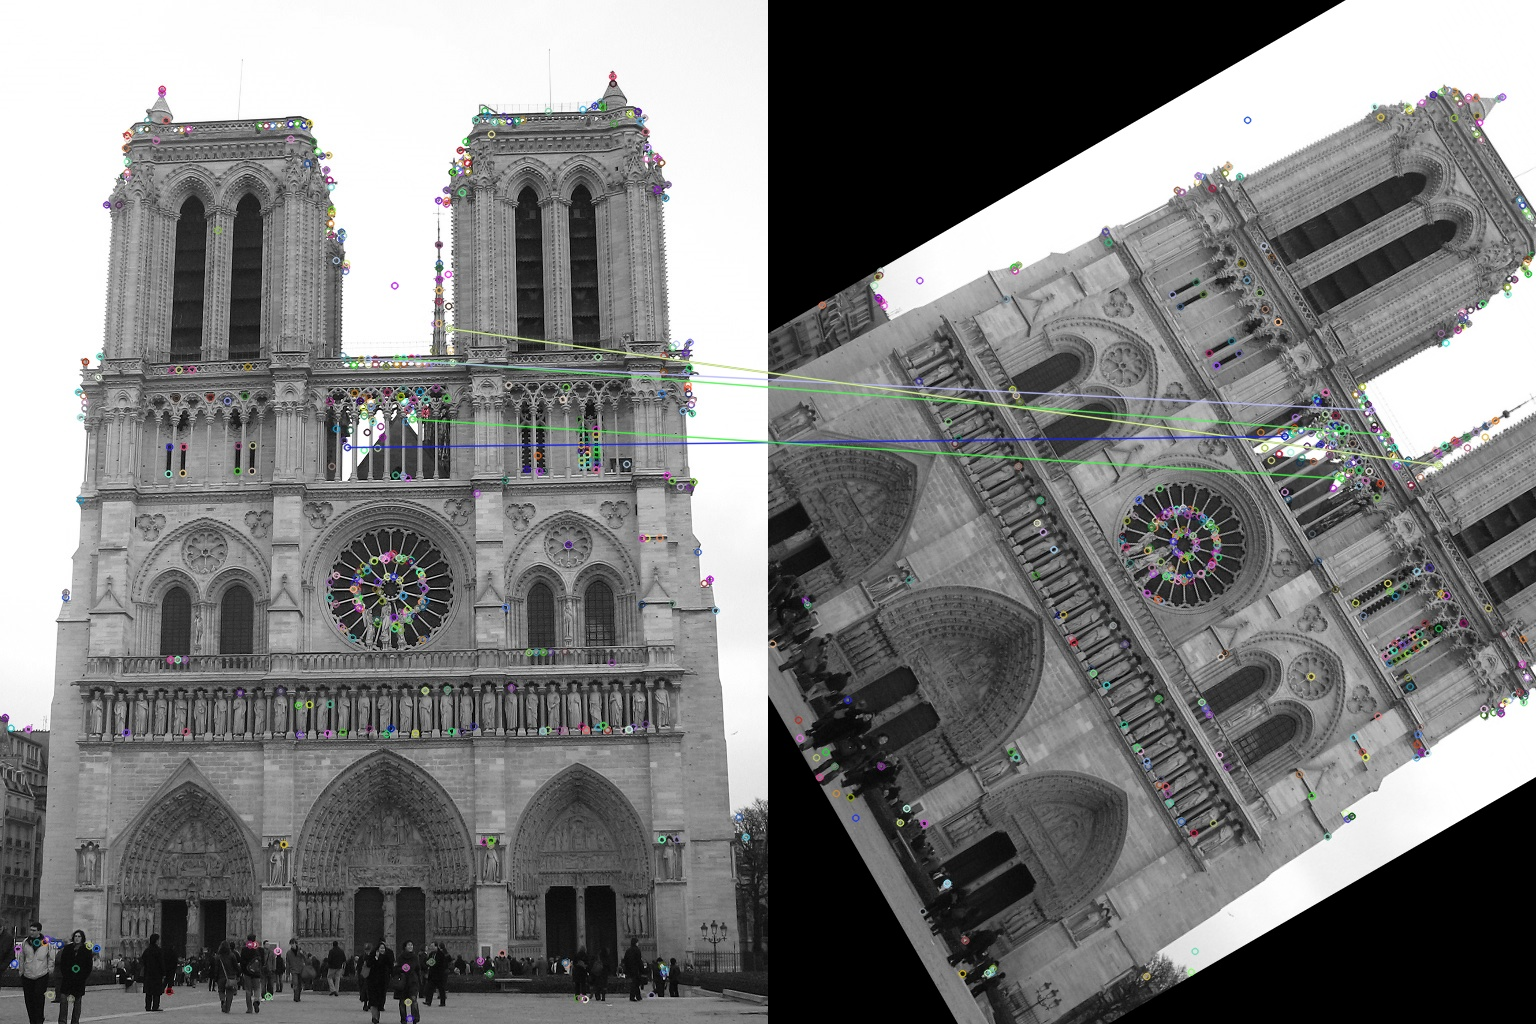